In [43]:
from quantile_forest import RandomForestQuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from tinycp.regressor import ConformalizedQuantileRegressor
from tinycp.plot import plot_prediction_intervals
import numpy as np

In [44]:
data = fetch_california_housing(as_frame=True)
X, y = data.data, data.target


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [46]:
coverage = 0.80
alpha = 1 - coverage
quantiles = [alpha/2, 1 - alpha/2]

In [47]:
rf = RandomForestQuantileRegressor(random_state=42, default_quantiles=quantiles, n_jobs=-1, oob_score=True, max_depth=int(np.ceil(np.log2(len(X_train)) - 1)))
rf.fit(X_train, y_train)

RandomForestQuantileRegressor(default_quantiles=[0.09999999999999998, 0.9],
                              max_depth=13, n_jobs=-1, oob_score=True,
                              random_state=42)

In [48]:
reg = ConformalizedQuantileRegressor(
    rf,
    alpha=alpha,
)
reg.fit(X_train, y_train, oob=True)

In [49]:
y_pred_intervals = reg.predict_interval(X_test, alpha=0.2)
y_pred = reg.predict(X_test)

In [50]:
reg.evaluate(X_test, y_test, alpha=0.2)

{'total': 4128,
 'alpha': 0.2,
 'coverage_rate': 0.85,
 'interval_width_mean': 1.168,
 'mwis': 1.603,
 'mae': 0.364,
 'mbe': 0.039}

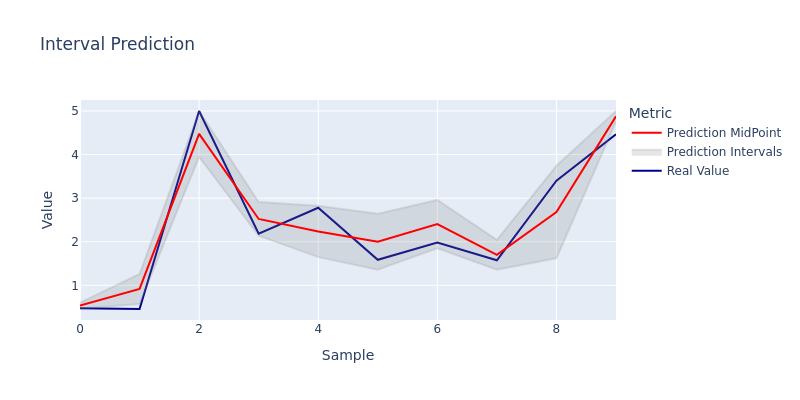

In [51]:
plot_prediction_intervals(y_pred_intervals[:10], y_pred[:10], y_test[:10], fig_type="png")